<h1>Capstone Project - Modelling

<img src="https://assets.goal.com/v3/assets/bltcc7a7ffd2fbf71f5/bltdd8c38b89351c490/62f8ed2bab34ea107448640f/Putellas_Mead_Morgan_GFX.jpeg" width="500">

###
The project aims to find solutions to the following problems:
<li>Let's say player X departs a team, and the team needs a player who is similar to the player who is departing.</li>
<li>Clubs occasionally fail to sign their top transfer targets for a variety of reasons. Then they would have to choose the best alternate signing.</li>
<li>Coaches occasionally have to select a versatile player to replace one who is currently playing in a different position owing to an injury or another circumstance. </li>


### Import Libraries

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import time

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

import pickle

from sklearn_som.som import SOM


### Functions

In [46]:
def plot_correlation(corr,figsize=(6,6)):

    """
    Plot correlation matrix
    i/p: corr
    """

    plt.figure(figsize = figsize) # setting the size of the output

    sns.heatmap(corr,
                annot = True,
                linecolor='black',
                center=0,
                vmin=-1,
                vmax=1,
                cmap = sns.diverging_palette(600,600, as_cmap=True),
                fmt='.4g')

    plt.title('Car features and thier correlation') # naming the plot

    #plt.savefig('plot.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

    plt.show()

### Load Data

In [47]:
player_df = pd.read_csv('data/female_player_abilities.csv', low_memory=False)
player_df.head()

,Unnamed: 0,sofifa_id,short_name,preferred_foot,overall,player_positions,weak_foot,skill_moves,work_rate,body_type,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,0,227246,L. Bronze,Right,92,"RB, CM",3,3,High/High,Normal (170-185),...,80,90,88,89,10,14,16,8,15,NaN
1,1,227316,W. Renard,Right,92,CB,2,2,High/Medium,Lean (185+),...,80,90,93,91,7,14,17,11,15,NaN
2,2,233746,V. Miedema,Right,92,ST,4,4,High/Low,Normal (170-185),...,91,22,30,23,14,16,17,14,17,NaN
3,3,227125,S. Kerr,Right,91,"ST, LW",4,4,High/Medium,Normal (170-),...,92,36,38,23,7,12,8,16,13,NaN
4,4,226301,A. Morgan,Left,90,ST,4,4,High/Low,Unique,...,91,34,29,27,11,11,10,10,11,NaN


In [48]:
player_df.shape

(391, 51)

> ### There are only 391 female players in the dataset

Drop Unnamed column  

In [49]:
player_df.drop(columns=['Unnamed: 0'],inplace=True)
player_df.set_index('sofifa_id',inplace=True)
player_df.head()

,short_name,preferred_foot,overall,player_positions,weak_foot,skill_moves,work_rate,body_type,pace,shooting,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,L. Bronze,Right,92,"RB, CM",3,3,High/High,Normal (170-185),86.0,61.0,...,80,90,88,89,10,14,16,8,15,NaN
227316,W. Renard,Right,92,CB,2,2,High/Medium,Lean (185+),68.0,70.0,...,80,90,93,91,7,14,17,11,15,NaN
233746,V. Miedema,Right,92,ST,4,4,High/Low,Normal (170-185),81.0,93.0,...,91,22,30,23,14,16,17,14,17,NaN
227125,S. Kerr,Right,91,"ST, LW",4,4,High/Medium,Normal (170-),87.0,90.0,...,92,36,38,23,7,12,8,16,13,NaN
226301,A. Morgan,Left,90,ST,4,4,High/Low,Unique,86.0,88.0,...,91,34,29,27,11,11,10,10,11,NaN


In [50]:
# saves the player names for future use
player_names = player_df['short_name']

In [51]:
player_df['goalkeeping_speed'].fillna(0,inplace=True)
player_df.head()

,short_name,preferred_foot,overall,player_positions,weak_foot,skill_moves,work_rate,body_type,pace,shooting,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,L. Bronze,Right,92,"RB, CM",3,3,High/High,Normal (170-185),86.0,61.0,...,80,90,88,89,10,14,16,8,15,0.0
227316,W. Renard,Right,92,CB,2,2,High/Medium,Lean (185+),68.0,70.0,...,80,90,93,91,7,14,17,11,15,0.0
233746,V. Miedema,Right,92,ST,4,4,High/Low,Normal (170-185),81.0,93.0,...,91,22,30,23,14,16,17,14,17,0.0
227125,S. Kerr,Right,91,"ST, LW",4,4,High/Medium,Normal (170-),87.0,90.0,...,92,36,38,23,7,12,8,16,13,0.0
226301,A. Morgan,Left,90,ST,4,4,High/Low,Unique,86.0,88.0,...,91,34,29,27,11,11,10,10,11,0.0


In [52]:
player_df.dtypes

short_name                      object
preferred_foot                  object
overall                          int64
player_positions                object
weak_foot                        int64
skill_moves                      int64
work_rate                       object
body_type                       object
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration            int64
movement_sprint_speed    

## Feature Engineering

In [53]:
def feature_eng(df):

    """
    Performs Feature engineering
    i/p: corr
    """
    df['goalkeeping_speed'].fillna(0,inplace=True)

    # creates a new column for main position
    df["first_position"] = df.apply (lambda x: x["player_positions"].split (",")[0], axis=1)
    # creates a new column for total positions
    df["total_position_count"] = df.apply (lambda x: len (x["player_positions"].split (",")), axis=1)

    # creates a new column for 1st workrate
    df["work_rate1"] = df["work_rate"].apply (lambda x: x.split ("/")[0])
    # creates a new column for 2nd workrate
    df["work_rate2"] = df["work_rate"].apply (lambda x: x.split ("/")[1])


    # list of columns to label encode
    label_encode_cols = ['preferred_foot', 'work_rate1', 'work_rate2', 'first_position','body_type']
    labelencoder = LabelEncoder()

    # label encoding categrical column values
    for col in label_encode_cols:
        # trans[col].fillna("0", inplace = True)
        df[col + '_Encoded'] = labelencoder.fit_transform(df[col])

    df.drop(columns=['player_positions','work_rate'],inplace=True)
    
    return df

player_df_new = feature_eng(player_df.copy())

In [54]:
player_positions = player_df_new['first_position']

player_df_new.head()

,short_name,preferred_foot,overall,weak_foot,skill_moves,body_type,pace,shooting,passing,dribbling,...,goalkeeping_speed,first_position,total_position_count,work_rate1,work_rate2,preferred_foot_Encoded,work_rate1_Encoded,work_rate2_Encoded,first_position_Encoded,body_type_Encoded
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,L. Bronze,Right,92,3,3,Normal (170-185),86.0,61.0,70.0,81.0,...,0.0,RB,2,High,High,1,0,0,9,4
227316,W. Renard,Right,92,2,2,Lean (185+),68.0,70.0,62.0,73.0,...,0.0,CB,1,High,Medium,1,0,2,1,2
233746,V. Miedema,Right,92,4,4,Normal (170-185),81.0,93.0,75.0,88.0,...,0.0,ST,1,High,Low,1,0,1,12,4
227125,S. Kerr,Right,91,4,4,Normal (170-),87.0,90.0,72.0,91.0,...,0.0,ST,2,High,Medium,1,0,2,12,3
226301,A. Morgan,Left,90,4,4,Unique,86.0,88.0,74.0,86.0,...,0.0,ST,1,High,Low,0,0,1,12,7


Object type columns

In [55]:
object_clmns = player_df_new.dtypes[player_df_new.dtypes == "object"].index 
object_clmns


Index(['short_name', 'preferred_foot', 'body_type', 'first_position',
       'work_rate1', 'work_rate2'],
      dtype='object')

Numeric columns

In [56]:
numeric_clmns = player_df_new.dtypes[player_df_new.dtypes != "object"].index 
numeric_clmns


Index(['overall', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',

### Creating a new dataset based  on numerical features 

In [57]:
player_df_new = player_df_new[numeric_clmns]
player_df_new.head()

,overall,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,total_position_count,preferred_foot_Encoded,work_rate1_Encoded,work_rate2_Encoded,first_position_Encoded,body_type_Encoded
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,92,3,3,86.0,61.0,70.0,81.0,89.0,84.0,78,...,16,8,15,0.0,2,1,0,0,9,4
227316,92,2,2,68.0,70.0,62.0,73.0,91.0,88.0,25,...,17,11,15,0.0,1,1,0,2,1,2
233746,92,4,4,81.0,93.0,75.0,88.0,32.0,79.0,69,...,17,14,17,0.0,1,1,0,1,12,4
227125,91,4,4,87.0,90.0,72.0,91.0,39.0,80.0,74,...,8,16,13,0.0,2,1,0,2,12,3
226301,90,4,4,86.0,88.0,74.0,86.0,43.0,71.0,71,...,10,10,11,0.0,1,0,0,1,12,7


### Plot Correlation 

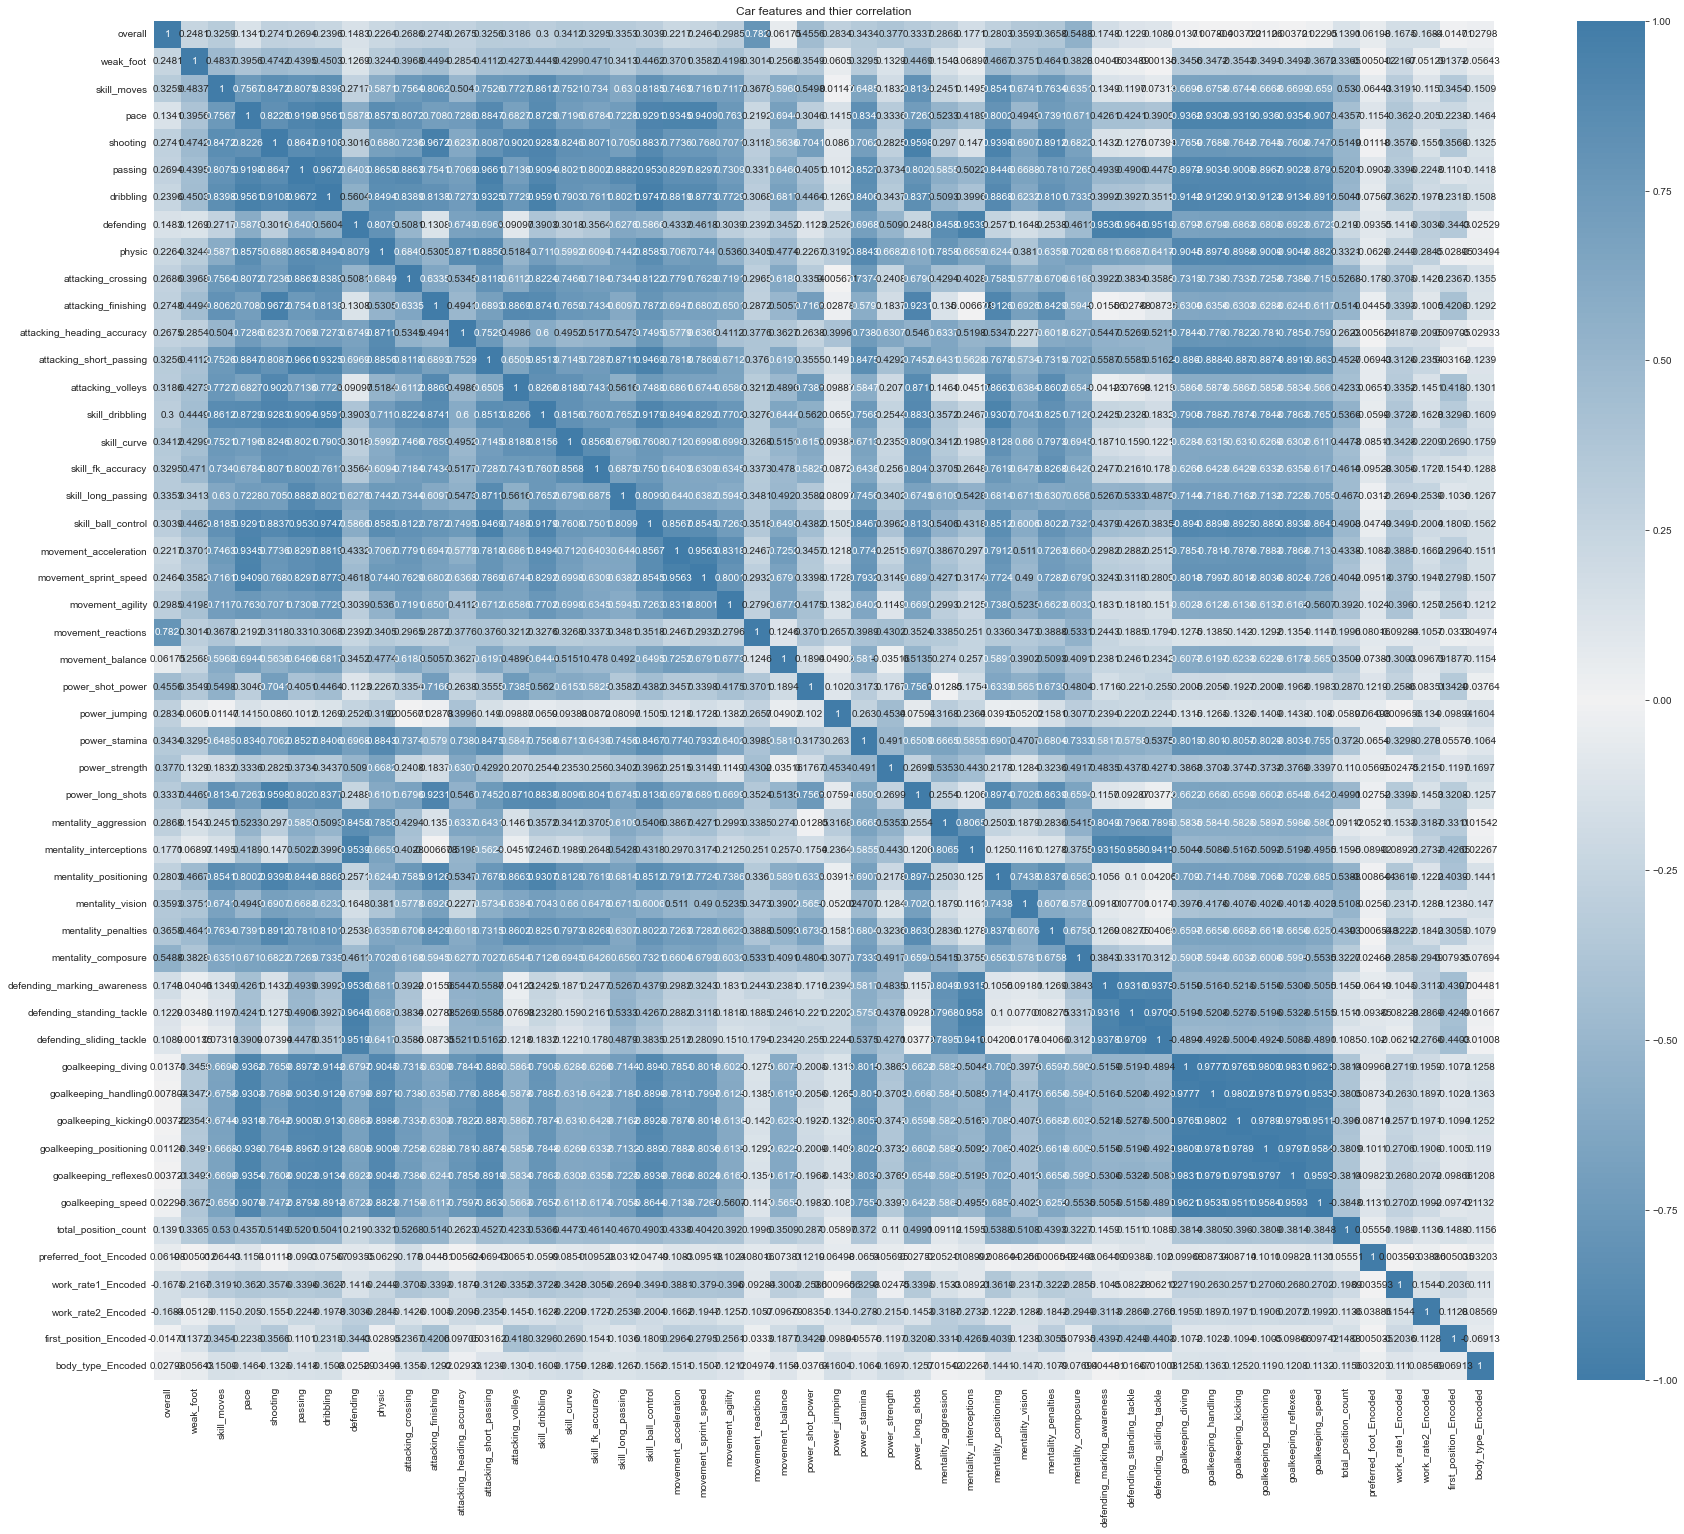

In [58]:
plot_correlation(player_df_new.corr(),figsize=(30,25))

> ## From the correlation matrix,it can be observed that there is high correlation between some  of the features

In [59]:
fig = px.imshow(player_df_new.corr(), text_auto=True)
fig.show()

In [60]:
player_df_new.shape

(391, 50)

## Modelling

In [61]:
pl_df = player_df_new.drop(columns=['goalkeeping_speed'])

pl_df.head()

,overall,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,total_position_count,preferred_foot_Encoded,work_rate1_Encoded,work_rate2_Encoded,first_position_Encoded,body_type_Encoded
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,92,3,3,86.0,61.0,70.0,81.0,89.0,84.0,78,...,14,16,8,15,2,1,0,0,9,4
227316,92,2,2,68.0,70.0,62.0,73.0,91.0,88.0,25,...,14,17,11,15,1,1,0,2,1,2
233746,92,4,4,81.0,93.0,75.0,88.0,32.0,79.0,69,...,16,17,14,17,1,1,0,1,12,4
227125,91,4,4,87.0,90.0,72.0,91.0,39.0,80.0,74,...,12,8,16,13,2,1,0,2,12,3
226301,90,4,4,86.0,88.0,74.0,86.0,43.0,71.0,71,...,11,10,10,11,1,0,0,1,12,7


In [62]:

if 'pred_labels' in pl_df:
    pl_df = player_df.drop(columns=['pred_labels'])

if 'name' in pl_df:
    pl_df = player_df.drop(columns=['name'])



Creating a KMeans model using k value of 20

This is done because we have observed that there can be upto 27 different positions on a football pitch

In [63]:

km = KMeans(n_clusters=20, random_state=124)
km.fit(pl_df)

pred_labels = km.labels_ 


### Clusters and their corresponding points

In [64]:
pl_df["pred_labels"] = pred_labels
pl_df["name"] = player_names

# get indices of each cluster and their points
cluster_dict = {i: pl_df.index[pl_df['pred_labels']==i].tolist() for i in range(km.n_clusters)}

pl_df.to_csv('models/female_pl_df.csv')
pl_df.head(5)

,overall,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,goalkeeping_positioning,goalkeeping_reflexes,total_position_count,preferred_foot_Encoded,work_rate1_Encoded,work_rate2_Encoded,first_position_Encoded,body_type_Encoded,pred_labels,name
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,92,3,3,86.0,61.0,70.0,81.0,89.0,84.0,78,...,8,15,2,1,0,0,9,4,15,L. Bronze
227316,92,2,2,68.0,70.0,62.0,73.0,91.0,88.0,25,...,11,15,1,1,0,2,1,2,12,W. Renard
233746,92,4,4,81.0,93.0,75.0,88.0,32.0,79.0,69,...,14,17,1,1,0,1,12,4,7,V. Miedema
227125,91,4,4,87.0,90.0,72.0,91.0,39.0,80.0,74,...,16,13,2,1,0,2,12,3,7,S. Kerr
226301,90,4,4,86.0,88.0,74.0,86.0,43.0,71.0,71,...,10,11,1,0,0,1,12,7,7,A. Morgan


### obtain player id 

In [65]:
pldf = pd.read_csv('models/female_pl_df.csv')
playerA_id = pldf[pldf['name']=="Alexia Putellas"]['sofifa_id'].item()
playerA_id

227203

In [66]:
playerA_id = pldf[(pldf['name']=="L. Bronze") & (pldf['overall']==92)]['sofifa_id'].item()
playerA_id

227246

###  Scatter Plot of the player clusters

In [67]:
fig = px.scatter_3d(pl_df, x='passing', y='overall', z='dribbling',
              color="pred_labels", log_x=True, hover_name="name", hover_data=["overall"])
fig.show()

We can see that players have been clustered based on their similarity

<li> These clusters are almost analogous to their original player positions

## PCA


In [68]:
if 'pred_labels' in pl_df.columns:
    pl_df = pl_df.drop(columns=['pred_labels'])


if 'name' in pl_df.columns:
    pl_df = pl_df.drop(columns=['name'])

# try: 
X_std=pd.DataFrame(StandardScaler().fit_transform(pl_df),index=pl_df.index,columns=pl_df.columns)
X_std

,overall,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,total_position_count,preferred_foot_Encoded,work_rate1_Encoded,work_rate2_Encoded,first_position_Encoded,body_type_Encoded
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,2.664446,-0.044542,0.230725,0.809108,0.271693,0.462960,0.726470,1.406422,1.064357,0.878608,...,-0.232015,-0.145900,-0.510287,-0.193105,0.234720,0.507183,-1.385392,-2.005835,0.739759,0.743920
227316,2.664446,-1.495859,-0.806210,0.108246,0.620121,0.128980,0.408518,1.480285,1.232555,-1.516786,...,-0.232015,-0.097678,-0.368715,-0.193105,-1.076357,0.507183,-1.385392,0.557176,-1.284708,-0.560442
233746,2.664446,1.406775,1.267659,0.614424,1.510548,0.671698,1.004677,-0.698677,0.854110,0.471843,...,-0.137271,-0.097678,-0.227143,-0.102136,-1.076357,0.507183,-1.385392,-0.724329,1.498934,0.743920
227125,2.490145,1.406775,1.267659,0.848045,1.394405,0.546456,1.123909,-0.440156,0.896159,0.697823,...,-0.326760,-0.531679,-0.132762,-0.284073,0.234720,0.507183,-1.385392,0.557176,1.498934,0.091739
226301,2.315844,1.406775,1.267659,0.809108,1.316977,0.629951,0.925189,-0.292430,0.517714,0.562235,...,-0.374132,-0.435234,-0.415906,-0.375042,-1.076357,-1.971674,-1.385392,-0.724329,1.498934,2.700465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261799,-1.867386,-0.044542,1.267659,0.225057,0.349121,0.254222,0.368775,-0.735609,-0.407375,0.110274,...,-0.374132,-0.628123,-0.321524,-0.647948,0.234720,0.507183,0.755668,0.557176,-0.778591,0.091739
261856,-1.867386,-0.044542,0.230725,0.380804,0.503978,-0.330244,0.011079,-1.289582,0.055170,-0.838845,...,-0.610994,-0.387012,-0.604669,-0.420526,-1.076357,0.507183,0.755668,0.557176,1.498934,2.048283
263000,-1.867386,-1.495859,-0.806210,0.263993,0.581406,-0.163253,0.170055,-0.587883,-0.323276,-0.206099,...,-0.563621,-0.628123,-0.651860,-0.193105,0.234720,0.507183,0.755668,0.557176,1.498934,0.091739


In [69]:
pca = PCA()
principalcomponents = pca.fit_transform(X_std)

### Bar plot of variance ratio of each PC's

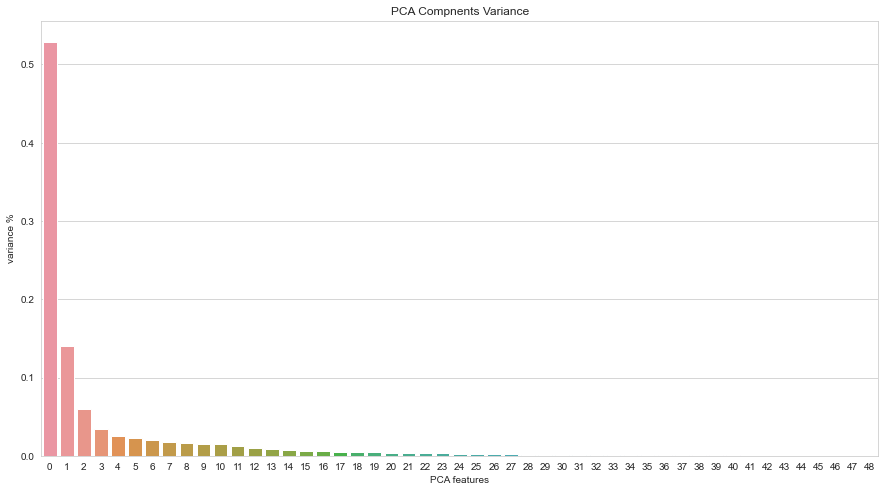

In [70]:
features = list(range(pca.n_components_))

plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

sns.barplot(x=features, y=pca.explained_variance_ratio_, capsize=.2)
plt.title('PCA Compnents Variance')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

> ### The first 4 components are having the highest variance ratio and hence they will be chosen for modelling

In [71]:
PCA_components = pd.DataFrame(principalcomponents)
PCA_components['sofifa_id'] = pl_df.index
PCA_components.set_index('sofifa_id',inplace=True)
PCA_components.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,-4.156529,2.974506,-3.134183,0.636313,-2.468671,1.296397,-1.321277,0.138143,-0.359051,-0.538318,...,-0.155124,-0.130195,-0.211385,-0.071977,0.051558,0.010747,-0.016034,0.001569,-0.006875,0.004149
227316,-2.528798,3.732133,-4.353642,1.824298,0.401062,1.008199,0.979821,-0.668555,-0.011972,-2.191194,...,-0.044438,0.016280,-0.183636,-0.162785,0.064717,-0.021536,-0.024936,0.014838,0.006750,0.003428
233746,-5.030640,-3.777270,-3.835445,2.007953,-1.097765,0.438163,0.336397,0.173144,-0.830784,-0.549853,...,0.047781,-0.064549,-0.037394,-0.018654,-0.092442,-0.022133,-0.028735,0.018973,0.009890,-0.016749
227125,-5.736747,-3.296494,-3.220707,2.166978,-2.119568,0.133993,-0.680886,-0.786815,-0.524484,0.088183,...,0.527073,-0.021224,0.213985,-0.145488,0.088355,-0.009232,0.038989,0.064029,0.016716,0.024351
226301,-4.936464,-2.937470,-2.733752,1.998408,-1.913192,-1.274534,1.215511,2.367961,-0.977631,-0.266757,...,-0.230705,0.056075,-0.106912,-0.013561,0.015625,0.019988,0.036642,0.020523,0.004724,-0.001362


In [72]:

model = KMeans(n_clusters=25)

# Fit model to samples
model.fit(PCA_components.iloc[:,:4]) ## Using 4 feature components



KMeans(n_clusters=25)

In [73]:
PCA_components["pred_labels"] = pred_labels
PCA_components["name"] = player_names

# create a dictionary of clusters and their indices
cluster_dict = {i: pl_df.index[PCA_components['pred_labels']==i].tolist() for i in range(model.n_clusters)}


abilities=['dribbling','passing','overall','defending','physic','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
            'skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength',
            'power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
            'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']

for col in abilities:
    PCA_components[col] = pl_df[col]

PCA_components.head()

,0,1,2,3,4,5,6,7,8,9,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,,,,,,,,,,,,,,,,,,,,,
227246,-4.156529,2.974506,-3.134183,0.636313,-2.468671,1.296397,-1.321277,0.138143,-0.359051,-0.538318,...,53,80,90,88,89,10,14,16,8,15
227316,-2.528798,3.732133,-4.353642,1.824298,0.401062,1.008199,0.979821,-0.668555,-0.011972,-2.191194,...,60,80,90,93,91,7,14,17,11,15
233746,-5.030640,-3.777270,-3.835445,2.007953,-1.097765,0.438163,0.336397,0.173144,-0.830784,-0.549853,...,78,91,22,30,23,14,16,17,14,17
227125,-5.736747,-3.296494,-3.220707,2.166978,-2.119568,0.133993,-0.680886,-0.786815,-0.524484,0.088183,...,72,92,36,38,23,7,12,8,16,13
226301,-4.936464,-2.937470,-2.733752,1.998408,-1.913192,-1.274534,1.215511,2.367961,-0.977631,-0.266757,...,89,91,34,29,27,11,11,10,10,11


### Best ball carrier

In [74]:
fig = px.scatter_3d(PCA_components, x='passing', y='overall', z='dribbling',
              color="pred_labels", log_x=True, hover_name="name", hover_data=["overall"])
fig.show()


> ### We can see that the best ball carriers are T. Heath and M.Rapinoe

### Finding Keepers

In [75]:
fig = px.scatter_3d(PCA_components, x='goalkeeping_diving', y='goalkeeping_reflexes', z='goalkeeping_positioning',
              color="pred_labels", log_x=True, hover_name="name", hover_data=["passing"])
fig.show()

> ### From this we can see that KMeans(with PCA) produced great results

## DBSCAN

In [76]:
scaler = MinMaxScaler()

DBScan_df = pl_df[['goalkeeping_diving',
                   'goalkeeping_reflexes',
                   'goalkeeping_positioning',
                   'passing',
                   'pace']]

db = DBSCAN(eps=0.2, min_samples=2, n_jobs=-1).fit(DBScan_df) ## We played around with tweaking the epsilon value and minimum sample size.

# add the cluster labels to the columns
DBScan_df['pred_labels'] = db.labels_
DBScan_df['name'] = player_names


# Count the total number of clusters
n_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
n_clusters

20

In [77]:
fig = px.scatter_3d(DBScan_df, x='goalkeeping_diving', y='passing', z='goalkeeping_positioning',
              color="pred_labels", log_x=True, hover_name="name", hover_data=["pace"])

fig.show()

> ## DBSCAN could not produce great results with the data. 

Function to find top 5 similiar players

In [78]:
# saving prediction results to csv
PCA_components.to_csv('models/female_pca_result.csv')

In [79]:
pc = pd.read_csv('models/female_pca_result.csv', low_memory=False)
pc.head()

,sofifa_id,0,1,2,3,4,5,6,7,8,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,227246,-4.156529,2.974506,-3.134183,0.636313,-2.468671,1.296397,-1.321277,0.138143,-0.359051,...,53,80,90,88,89,10,14,16,8,15
1,227316,-2.528798,3.732133,-4.353642,1.824298,0.401062,1.008199,0.979821,-0.668555,-0.011972,...,60,80,90,93,91,7,14,17,11,15
2,233746,-5.030640,-3.777270,-3.835445,2.007953,-1.097765,0.438163,0.336397,0.173144,-0.830784,...,78,91,22,30,23,14,16,17,14,17
3,227125,-5.736747,-3.296494,-3.220707,2.166978,-2.119568,0.133993,-0.680886,-0.786815,-0.524484,...,72,92,36,38,23,7,12,8,16,13
4,226301,-4.936464,-2.937470,-2.733752,1.998408,-1.913192,-1.274534,1.215511,2.367961,-0.977631,...,89,91,34,29,27,11,11,10,10,11


In [80]:
pl_df= pd.read_csv('models/female_pl_df.csv', low_memory=False)

pc[(pl_df['name']==str('L. Bronze')) & (pl_df['overall']==92)]['sofifa_id'].item()

227246

In [81]:
pc.shape

(391, 91)

In [82]:
pl_df.shape

(391, 52)

In [83]:
def get_similiar_players(playerA_id,player_count=5):
    """
    find top 5 similiar players
    i/p: player_id
    """

    # find the cluster the player belongs to

 
    # find the cluster the player belongs
    cluster = PCA_components.loc[playerA_id]['pred_labels']

    # get the features of playerA
    playerA_data = PCA_components.loc[playerA_id].head()

    # get the other players in the same cluster
    cluster_indices = cluster_dict[cluster]


    # get the other players in the same cluster
    cluster_indices = cluster_dict[cluster]

    # initialise a temp dictionary to store player ids and distances
    dist_dict={}

    # iterate through each player in the cluster
    for player_id in cluster_indices:

        if(player_id != playerA_id):

        
            playerB_data = PCA_components.loc[player_id].head()
            dist = np.linalg.norm(playerA_data-playerB_data)
            dist_dict[player_id]=dist.round(4)
        
    
    dist_df = pd.DataFrame(columns=['id','distance'])

    dist_df['id'] = dist_dict.keys()
    dist_df['distance'] = dist_dict.values()
    dist_df.sort_values('distance',inplace=True)

    similiar_players = dist_df.head(player_count)
    
    name_list=[]

    for id in list(similiar_players['id']):
        name_list.append(player_df.loc[id]['short_name'])

    similiar_players['name'] =name_list

    return similiar_players

    


Players similiar to Kylian Mbappe

In [84]:
similiar_players = get_similiar_players(playerA_id=227246,player_count=10)
similiar_players

,id,distance,name
3,226922,2.7670,Wu Haiyan
1,227466,2.8027,K. Robles
4,227119,2.9342,S. Catley
6,236641,3.3562,A. Dahlkemper
5,227300,3.3691,L. Maier
12,233757,3.4738,M. van Dongen
0,226318,3.6116,K. O'Hara
7,245177,3.6768,Letinha Lia
16,243419,3.7567,Lin Yuping
13,226988,3.8127,E. Rubensson


### Heirarchical Clustering

In [85]:
if 'pred_labels' in pl_df.columns:
    pl_df = pl_df.drop(columns=['pred_labels'])


if 'name' in pl_df.columns:
    pl_df = pl_df.drop(columns=['name'])

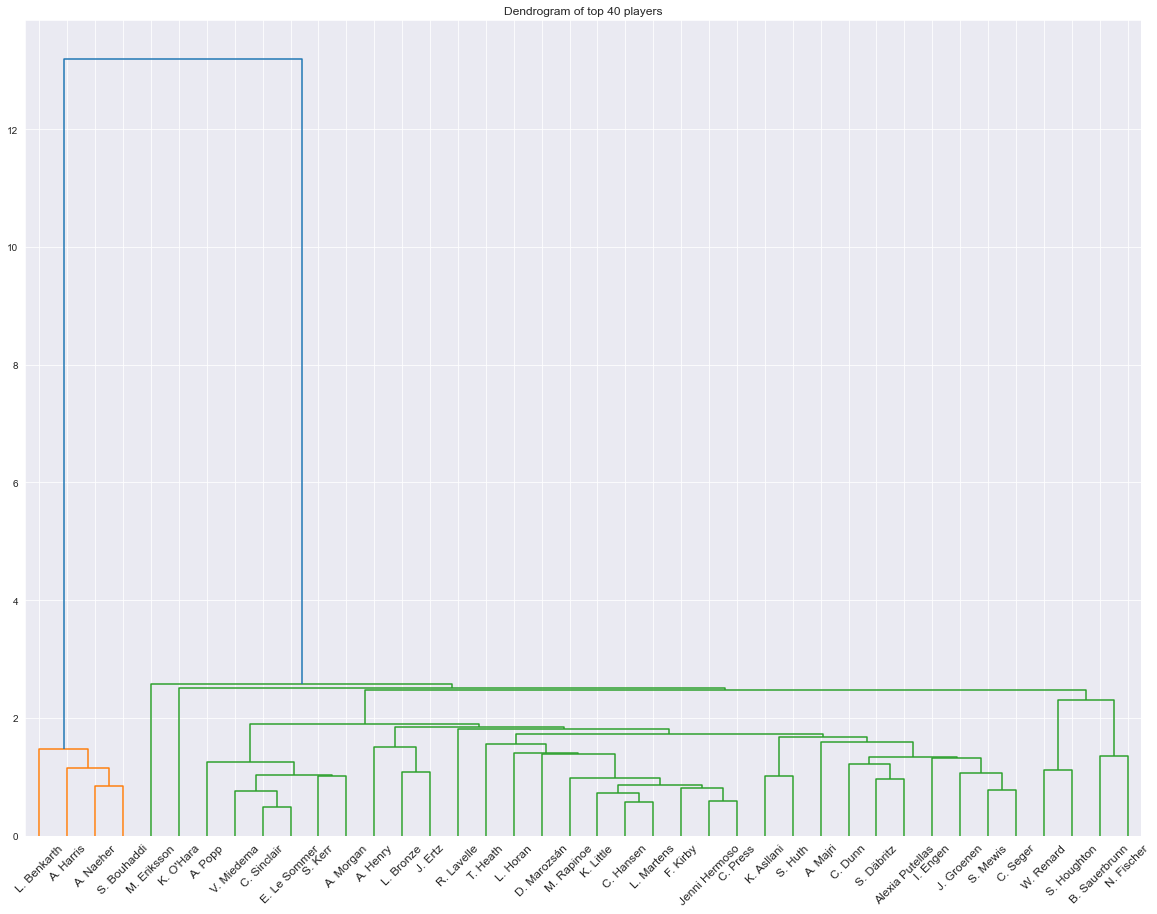

In [86]:
import scipy.cluster.hierarchy as shc


sns.set_style('darkgrid')

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram of top 40 players")  


# create a dendrogram of top 40 players in the dataset
dend = shc.dendrogram(shc.linkage(PCA_components.iloc[:40,:4].values,method='single'),
                                    labels=list(player_names[:40]),
                                    leaf_rotation=45,
                                    leaf_font_size=12)


> ## using Heirachical Clustering, a dendrogram was generated for top 40 players